<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/III.%20Matematica_Ciencia_Datos/Actividad5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [503]:
!pip install lifelines

In [504]:
import lifelines
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [505]:
data=pd.read_csv("/content/Employee_Attrition.csv")

In [506]:
data.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


In [507]:
data.shape

(1470, 35)

In [508]:
#data["Department"].unique()

#Análisis Exploratorio

In [509]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [510]:
pd.crosstab(data.Attrition,data.Gender,margins=True)

Gender,Female,Male,All
Attrition,,,
No,501,732,1233
Yes,87,150,237
All,588,882,1470


In [511]:
100*pd.crosstab(data.Attrition,data.Gender,normalize='index').round(4)

Gender,Female,Male
Attrition,,
No,40.63,59.37
Yes,36.71,63.29


In [512]:
#Se aprecia que los varones que reportaron cansados del trabajo es casi el doble de las mujeres con respecto al total de agotados

In [513]:
pd.crosstab(data.Attrition,data.MaritalStatus,margins=True)

MaritalStatus,Divorced,Married,Single,All
Attrition,,,,
No,294,589,350,1233
Yes,33,84,120,237
All,327,673,470,1470


In [514]:
100*pd.crosstab(data.Attrition,data.MaritalStatus,normalize='index').round(4)

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,23.84,47.77,28.39
Yes,13.92,35.44,50.63


In [515]:
#Apreciamos que los solteros que reportaron cansados del trabajo representan el 50.63 % de todos los cansados.

In [516]:
pd.crosstab(data.Attrition,data.Department,margins=True)

Department,Human Resources,Research & Development,Sales,All
Attrition,,,,
No,51,828,354,1233
Yes,12,133,92,237
All,63,961,446,1470


In [517]:
100*pd.crosstab(data.Attrition,data.Department,normalize='index').round(4)

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,4.14,67.15,28.71
Yes,5.06,56.12,38.82


In [518]:
#Observamos que de todas las áreas, Research & Development es el área con personas con mayor agotamiento

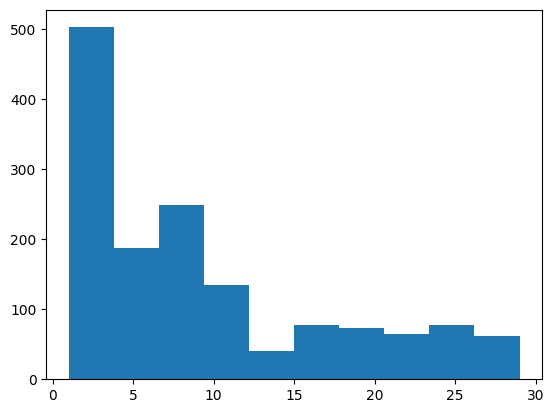

In [519]:
plt.hist(data["DistanceFromHome"]);

In [520]:
 #cuantos de los que dijeron si o no son de 'JobRole'

In [521]:
data.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7


In [522]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [523]:
#Seleccionamos las varibbles para el modelo
data=data[['DailyRate',
       'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager','Age', 'Attrition']]

In [524]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [525]:
#data['Department'].unique()

In [526]:
data['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [527]:
#Las variables categóricas como deparment, gender, MaritalStatus y Attrition las cambiamos a numéricas

In [528]:
data["Attrition"].replace({"Yes":1,"No":0},inplace=True)

In [529]:
data["Gender"].replace({"Female":0,"Male":1},inplace=True)

In [530]:
#data["Department"].replace({"Sales":0,"Research & Development":1,'Human Resources':2},inplace=True)

In [531]:
data["MaritalStatus"].replace({"Single":0,"Married":1,'Divorced':2},inplace=True)

In [532]:
data.head(2)

,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age,Attrition
0,1102,1,2,1,1,2,0,94,3,2,...,0,8,0,1,6,4,0,5,41,1
1,279,8,1,1,2,3,1,61,2,2,...,1,10,3,3,10,7,1,7,49,0


In [533]:
data.info()#verificamos que todaas nuestras varibles son numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   DailyRate                 1470 non-null   int64
 1   DistanceFromHome          1470 non-null   int64
 2   Education                 1470 non-null   int64
 3   EmployeeCount             1470 non-null   int64
 4   EmployeeNumber            1470 non-null   int64
 5   EnvironmentSatisfaction   1470 non-null   int64
 6   Gender                    1470 non-null   int64
 7   HourlyRate                1470 non-null   int64
 8   JobInvolvement            1470 non-null   int64
 9   JobLevel                  1470 non-null   int64
 10  JobSatisfaction           1470 non-null   int64
 11  MaritalStatus             1470 non-null   int64
 12  MonthlyIncome             1470 non-null   int64
 13  MonthlyRate               1470 non-null   int64
 14  NumCompaniesWorked        1470 non-null 

## Kaplan-Meier estimator

Text(0.5, 1.0, 'Survival Curve')

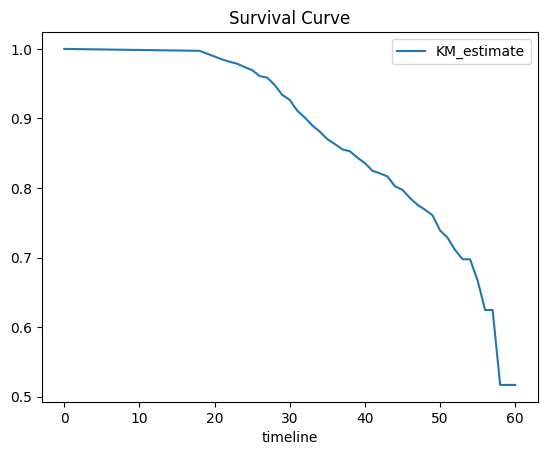

In [534]:
kmf = lifelines.KaplanMeierFitter()

T = data.Age
E = data.Attrition
kmf.fit(T, E)
kmf.survival_function_.plot()
plt.title('Survival Curve')
#plt.ylim(0,1);

<Axes: xlabel='timeline'>

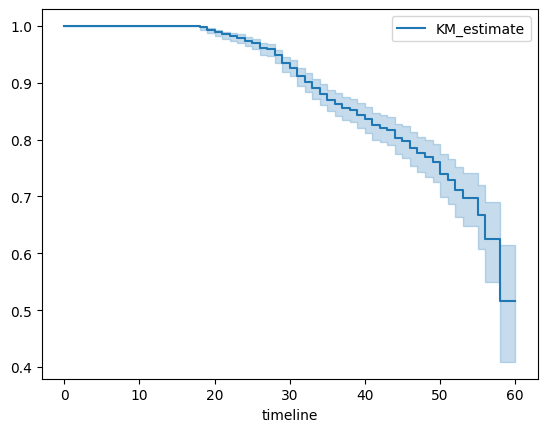

In [535]:
kmf.plot()

Observamos de la gráfica que desde los 30 años la caía es notoria, pero de los 40 años la caída ya es más pronunciada. Entonces podemos decir según el datashet
que desde los 40 años hacia adelante las personas tienden a agotarse del trabajo.

In [536]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,1470,1470
18.0,8,4,4,0,1470
19.0,9,6,3,0,1462
20.0,11,6,5,0,1453
21.0,13,6,7,0,1442
22.0,16,5,11,0,1429
23.0,14,4,10,0,1413
24.0,26,7,19,0,1399
25.0,26,6,20,0,1373


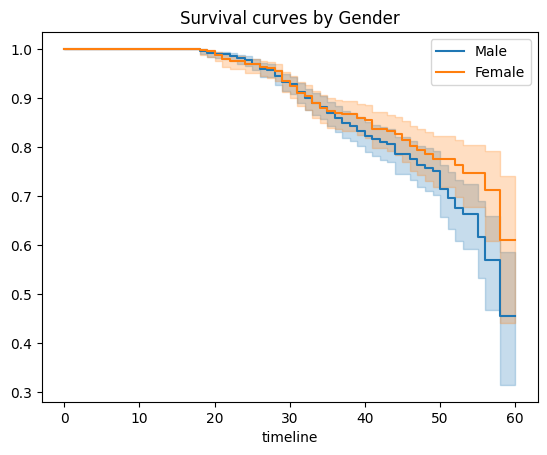

In [537]:
# H0: S1(t)=S2(t)
# Ha: S1(t)<>S2(t)

ax = plt.subplot(111)

opc = (data["Gender"] == 1)

kmf.fit(T[opc], event_observed=E[opc], label="Male")
kmf.plot_survival_function(ax=ax)

kmf.fit(T[~opc], event_observed=E[~opc], label="Female")
kmf.plot_survival_function(ax=ax)

plt.title("Survival curves by Gender");

In [538]:
from lifelines.statistics import logrank_test
results = logrank_test(T[opc], T[~opc], E[opc], E[~opc], alpha=.95)
results

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           2.08 0.15      2.74

## Cox Proportional Hazards Regression

In [539]:
data1=data[['DailyRate',
       'DistanceFromHome', 'Education',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole',
       'Age', 'Attrition']]

In [540]:
data1.head(3)

,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,Age,Attrition
0,1102,1,2,1,2,0,94,3,2,4,...,11,3,1,8,0,1,6,4,41,1
1,279,8,1,2,3,1,61,2,2,2,...,23,4,4,10,3,3,10,7,49,0
2,1373,2,2,4,4,1,92,2,1,3,...,15,3,2,7,3,3,0,0,37,1


In [541]:
data1.describe()

,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,Age,Attrition
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,802.485714,9.192517,2.912925,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,2.728571,...,15.209524,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,36.923810,0.161224
std,403.509100,8.106864,1.024165,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,1.102846,...,3.659938,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,9.135373,0.367863
min,102.000000,1.000000,1.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,1.000000,...,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000
25%,465.000000,2.000000,2.000000,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,...,12.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,30.000000,0.000000
50%,802.000000,7.000000,3.000000,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,3.000000,...,14.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,36.000000,0.000000
75%,1157.000000,14.000000,4.000000,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,4.000000,...,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,43.000000,0.000000
max,1499.000000,29.000000,5.000000,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,4.000000,...,25.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,60.000000,1.000000


In [542]:
from lifelines import CoxPHFitter

In [543]:
cph = CoxPHFitter()

In [544]:
cph.fit(data1, duration_col='Age', event_col='Attrition')

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>

In [545]:
#Se eliminaron algunas variables debido que no convergia.

In [546]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'Age'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1385.86
         time fit was run = 2023-12-19 03:05:47 UTC

---
                           coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                        
DailyRate                 -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
DistanceFromHome           0.02       1.02       0.01             0.01             0.04                 1.01                 1.04
Education                 -0.16       0.85       0.07            -0.29            -0.03                 0.75                 0.97
EmployeeNumber            -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
EnvironmentSatisfaction   -0.21       0.81       0.06            -0.33            -0.09                 0.72                 0.91
Gender                     0.16       1.18       0.14            -0.11             0.44                 0.90                 1.55
HourlyRate                -0.01       0.99       0.00            -0.01             0.00                 0.99                 1.00
JobInvolvement            -0.43       0.65       0.09            -0.60            -0.25                 0.55                 0.78
JobLevel                  -0.10       0.90       0.21            -0.51             0.31                 0.60                 1.36
JobSatisfaction           -0.30       0.74       0.06            -0.42            -0.18                 0.66                 0.84
MaritalStatus             -0.61       0.54       0.10            -0.80            -0.42                 0.45                 0.66
MonthlyIncome             -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
NumCompaniesWorked         0.04       1.04       0.03            -0.01             0.10                 0.99                 1.10
PercentSalaryHike         -0.07       0.93       0.03            -0.13            -0.01                 0.88                 0.99
PerformanceRating          0.47       1.60       0.30            -0.12             1.06                 0.89                 2.88
RelationshipSatisfaction  -0.17       0.85       0.06            -0.28            -0.05                 0.75                 0.95
TotalWorkingYears         -0.16       0.85       0.02            -0.21            -0.12                 0.81                 0.89
TrainingTimesLastYear     -0.14       0.87       0.05            -0.24            -0.03                 0.79                 0.97
WorkLifeBalance           -0.19       0.83       0.09            -0.37            -0.01                 0.69                 0.99
YearsAtCompany             0.09       1.09       0.03             0.03             0.14                 1.03                 1.15
YearsInCurrentRole        -0.11       0.90       0.04            -0.17            -0.04                 0.84                 0.96

                           cmp to     z      p   -log2(p)
covariate                                                
DailyRate                    0.00 -1.83   0.07       3.88
DistanceFromHome             0.00  3.04 <0.005       8.73
Education                    0.00 -2.40   0.02       5.91
EmployeeNumber               0.00 -0.86   0.39       1.36
EnvironmentSatisfaction      0.00 -3.53 <0.005      11.22
Gender                       0.00  1.19   0.23       2.10
HourlyRate                   0.00 -1.59   0.11       3.16
JobInvolvement               0.00 -4.74 <0.005      18.86
JobLevel                     0.00 -0.48   0.63       0.67
JobSati

<Axes: xlabel='log(HR) (95% CI)'>

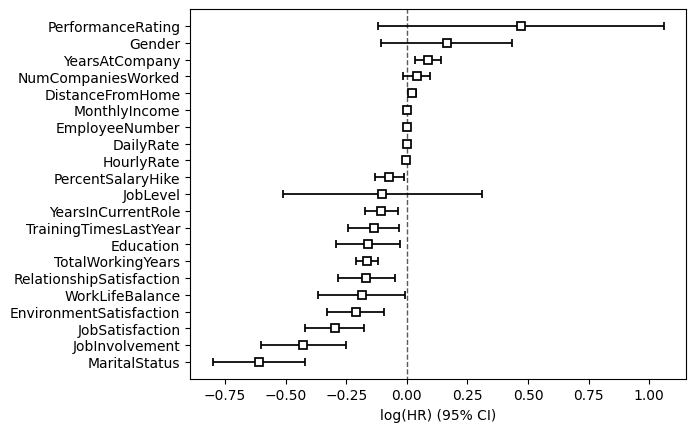

In [547]:
cph.plot()

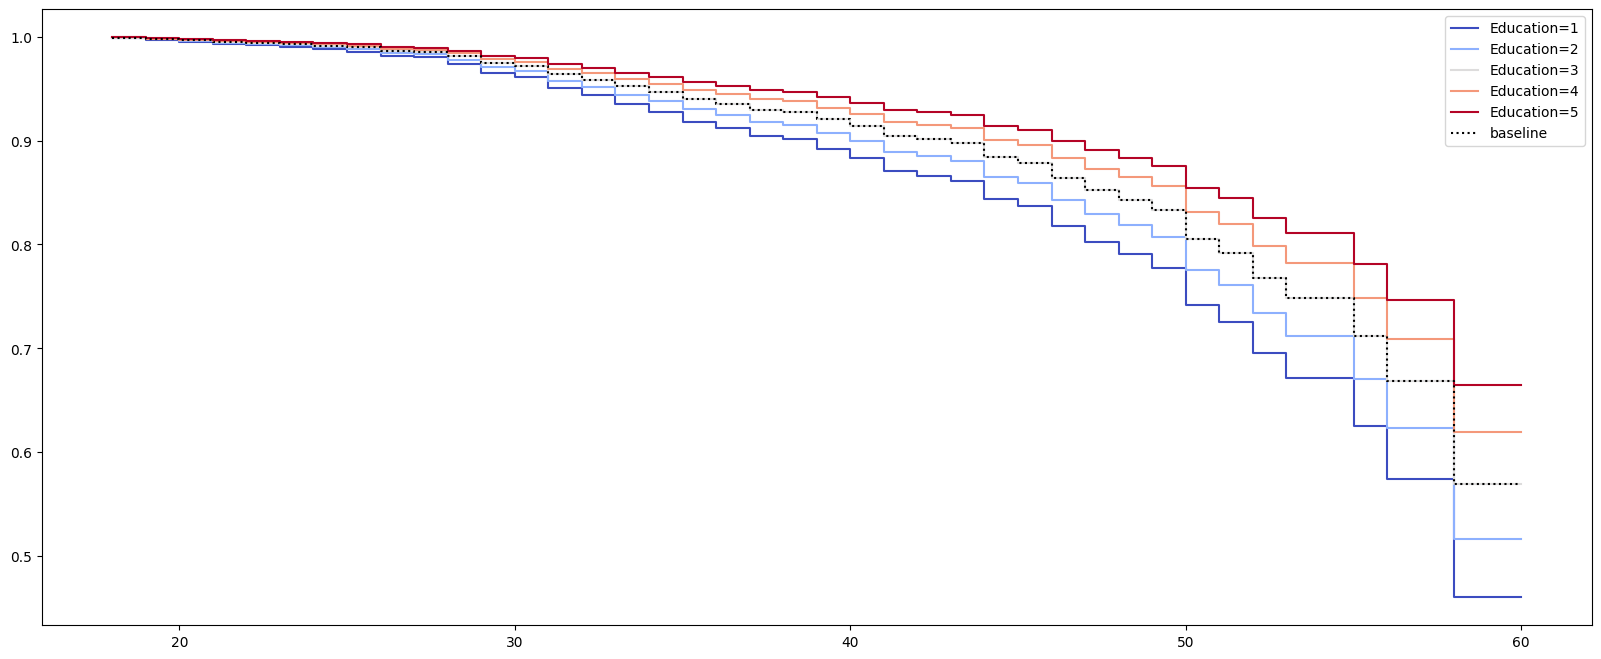

In [548]:
cph.plot_partial_effects_on_outcome(covariates='Education', values=[ 1, 2, 3, 4, 5], cmap='coolwarm',figsize=(20,8))
plt.show()

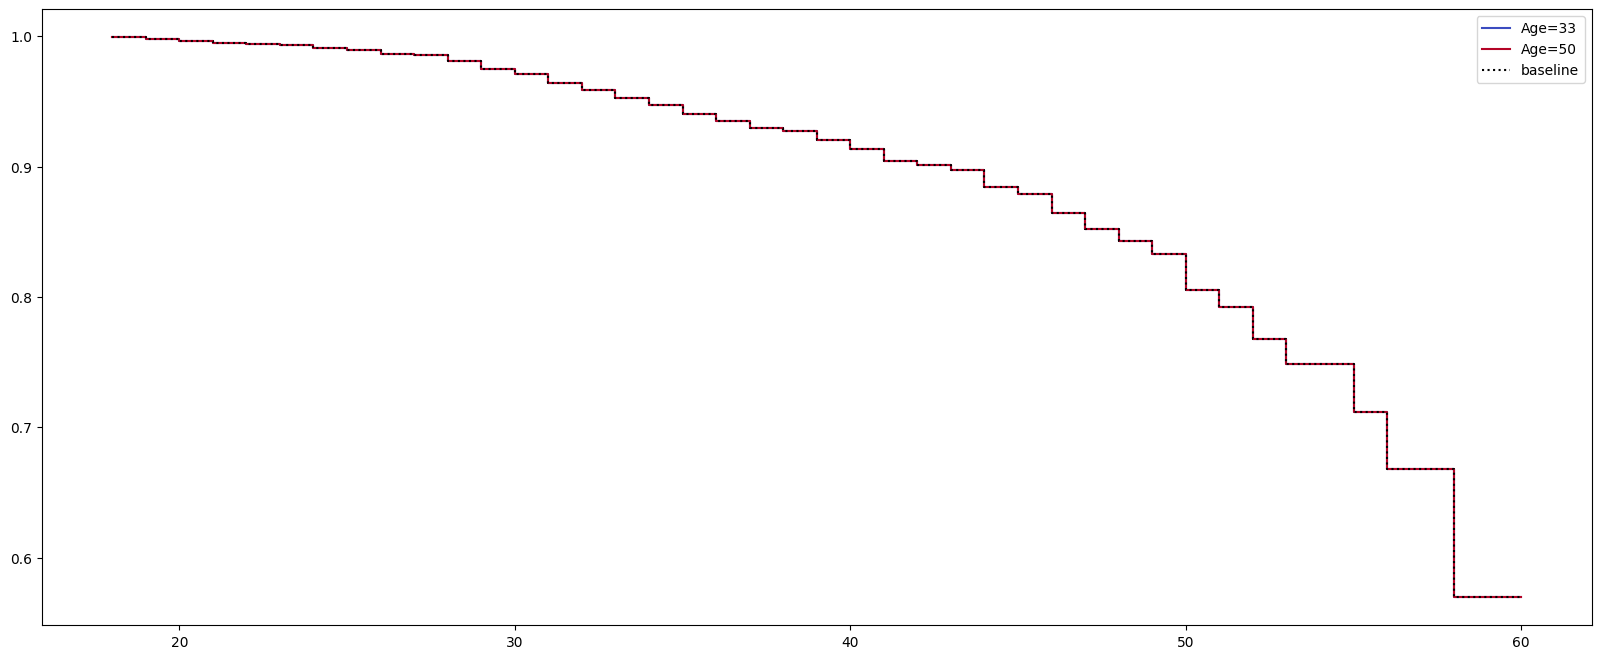

In [497]:
cph.plot_partial_effects_on_outcome(covariates='Age', values=[33,50], cmap='coolwarm',figsize=(20,8))
plt.show()